In [1]:
import subprocess
result_1 = subprocess.run(['pip', 'install', 'tensorflow'], capture_output=True, text=True)   # 필요 라이브러리 설치
result_2 = subprocess.run(['pip', 'show', 'tensorflow'], capture_output=True, text=True)
print(result_1.stdout)
print(result_2.stdout)          


Name: tensorflow
Version: 2.10.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\administrator\anaconda3\envs\new_py\lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: pykospacing



In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
RNN_df = pd.read_excel(r'C:\Users\administrator\Desktop\X_filter\Algorithm\dataset\Rnn_practice.xlsx')

sentences = RNN_df['Sentence'].tolist()
rnn_tokenizer = Tokenizer()
rnn_tokenizer.fit_on_texts(sentences)

In [4]:
vocab_size = len(rnn_tokenizer.word_index) + 1  # 어휘 사전에 크기 계산 

In [5]:
sequences = list()                                                      # 각 문장을 단어 시퀀스로 변환하고, 문장의 부분 시퀀스를 생성하여 리스트에 추가
for line in sentences:
    encoded = rnn_tokenizer.texts_to_sequences([line])[0]               # 현재 문장을 정수로 시퀀스로 변수
    for i in range(1, len(encoded)):                                    # 문장의 부분 시퀀스를 생성하고 리스트에 추가
        sequence = encoded[: i+1]
        sequences.append(sequence)

In [6]:
max_len = max(len(l) for l in sequences)                                # 모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')     # 시퀀스 데이터를 패딩하여 일정한 길이로 만듦 (여기서는 가장 긴 샘플의 길이로 패딩)

sequences = np.array(sequences)                                         # 패딩이 된 시퀀스를 넘파이 배열로 변환
                                                                        # 입력 및 출력 데이터 생성
X = sequences[:, :-1]                                                   # 시퀀스에서 마지막 단어를 제외한 부분은 입력(X)
y = sequences[:, -1]                                                    # 시퀀스에 마지막 단어는 출력
y = to_categorical(y, num_classes=vocab_size)                           # 출력(y)을 one-hot 인코딩 형태로 변환

In [7]:
from sklearn.model_selection import train_test_split

# 훈련 및 테스트 세트로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

embedding_dim = 10                                                      # 임베딩 차원을 10으로 10차원의 실수 벡터로 표현
hidden_units = 32                                                       # 순환 신경망 내 내부에서의 뉴련의 수


In [9]:
RNN_model = Sequential()                                                    
RNN_model.add(Embedding(vocab_size, embedding_dim))                     # Embedding 레이어 추가: 어휘 사전의 크기를 입력으로 받고, 지정된 임베딩 차원으로 단어를 임베딩
RNN_model.add(SimpleRNN(hidden_units))                                  # 지정된 은닉 유닛 수를 가진 단순한 RNN 레이어
RNN_model.add(Dense(vocab_size, activation='softmax'))                  # 출력 레이어 추가 : 어휘 사전의 크길르 가진 Dense 레이어를 사용하며, 활성화 함수는 softmax
RNN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
                                                                        # 모델 컴파일: 다중 클래스 분류 문제이므로 categorical_crossentropy 손실 함수와 Adam 옵티마이저 사용

In [10]:
RNN_model.fit(X_train, y_train, epochs=20, verbose=2)                   # 모델 학습: 입력(X) 및 출력(y) 데이터를 사용하여 주어진 에폭 동안 모델을 학습

Epoch 1/20
6/6 - 4s - loss: 4.6476 - accuracy: 0.0000e+00 - 4s/epoch - 678ms/step
Epoch 2/20
6/6 - 0s - loss: 4.6106 - accuracy: 0.4783 - 23ms/epoch - 4ms/step
Epoch 3/20
6/6 - 0s - loss: 4.5712 - accuracy: 0.4783 - 21ms/epoch - 3ms/step
Epoch 4/20
6/6 - 0s - loss: 4.5244 - accuracy: 0.4783 - 21ms/epoch - 4ms/step
Epoch 5/20
6/6 - 0s - loss: 4.4593 - accuracy: 0.4783 - 21ms/epoch - 3ms/step
Epoch 6/20
6/6 - 0s - loss: 4.3701 - accuracy: 0.4783 - 21ms/epoch - 4ms/step
Epoch 7/20
6/6 - 0s - loss: 4.2511 - accuracy: 0.4783 - 21ms/epoch - 3ms/step
Epoch 8/20
6/6 - 0s - loss: 4.0780 - accuracy: 0.4783 - 21ms/epoch - 4ms/step
Epoch 9/20
6/6 - 0s - loss: 3.8662 - accuracy: 0.4783 - 21ms/epoch - 3ms/step
Epoch 10/20
6/6 - 0s - loss: 3.6200 - accuracy: 0.4783 - 21ms/epoch - 3ms/step
Epoch 11/20
6/6 - 0s - loss: 3.3708 - accuracy: 0.4783 - 22ms/epoch - 4ms/step
Epoch 12/20
6/6 - 0s - loss: 3.1394 - accuracy: 0.4783 - 23ms/epoch - 4ms/step
Epoch 13/20
6/6 - 0s - loss: 2.9831 - accuracy: 0.4783 - 

In [13]:
def sentence_generation(current_word, n, temperature=1.0, model=RNN_model, tokenizer=rnn_tokenizer):
    init_word = current_word                                            # 시작 단어와 문장을 저장할 빈 문자열 초기화
    sentence = ''

    for _ in range(n):                                                  # n개 단어 만큼 문자 생성
        encoded = rnn_tokenizer.texts_to_sequences([current_word])[0]   # 현재 단어를 토크나이저를 사용하여 정수 시퀀스로 변환 
                                                                        # ex) "Hello, how are you?" => "Hello"가 1, "how"가 2, "are"가 3, "you"가 4라고 할 때 => [1, 2, 3, 4]
        encoded = pad_sequences([encoded], maxlen=5, padding='pre')     # 시퀀스가 5로 설정하고, 부족하면 앞쪽에 0을 채워넣고 부족하면 앞부분을 자른다.
                                                                        # 만약 뒤쪽으로 바꾸고싶으면 padding='post를 주면 된다.
        result = RNN_model.predict(encoded, verbose=0)                  # 모델의 다음단어 예측
        result = result / temperature                                   # 확률에 온도를 적용하여 랜덤성 조절
        result = np.exp(result) / np.sum(np.exp(result), axis=1)        # 소프트맥스를 적용하여 최종 확률 얻기
        sampled_index = np.random.choice(len(result[0]), p=result[0])   # 예측된 확률을 기반으로 다음 단어 샘플링
        word = rnn_tokenizer.index_word[sampled_index]

        current_word = current_word + ' ' + word                        # 현재 단어와 문장 업데이트
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

2/2 [==============================] - 0s 3ms/step


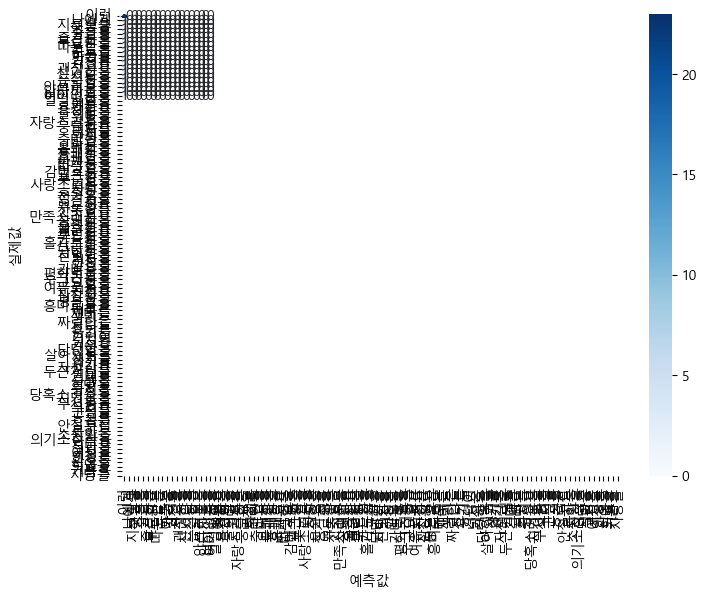

              precision    recall  f1-score   support

           2       0.56      1.00      0.72        23
           7       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         1
          49       0.00      0.00      0.00         1
          50       0.00      0.00      0.00         1
          60       0.00      0.00      0.00         1
          65       0.00      0.00      0.00         1
          78       0.00      0.00      0.00         1
          85       0.00      0.00      0.00         1
          86       0.00      0.00      0.00         1
          89       0.00    

c:\Users\administrator\anaconda3\envs\new_py\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\administrator\anaconda3\envs\new_py\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\administrator\anaconda3\envs\new_py\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt

# 모델 평가
y_pred = np.argmax(RNN_model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# 혼동 행렬 계산
conf_mat = confusion_matrix(y_true, y_pred)

# 폰트 설정 및 시각화
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정 (Windows 기준, 다른 OS에선 폰트 이름이 다를 수 있음)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=rnn_tokenizer.index_word.values(),
            yticklabels=rnn_tokenizer.index_word.values())
plt.xlabel('예측값')
plt.ylabel('실제값')
plt.show()

# 각 클래스에 대한 정밀도, 재현율, F1 점수 출력
print(classification_report(y_true, y_pred))

In [33]:
!pip install numpy matplotlib scikit-learn keras

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import sequence  # Use preprocessing module directly

# 가상의 데이터 생성 (실제 데이터로 대체해야 함)
X = np.random.randint(2, size=(1000, 10))  # 1000개의 시퀀스, 각 시퀀스는 길이 10
y = np.random.randint(2, size=(1000,))

# 데이터 전처리
vocab_size = 1000
embedding_dim = 50
max_sequence_length = 10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = sequence.pad_sequences(X_train, maxlen=max_sequence_length, padding='post')  # Use sequence directly
X_test = sequence.pad_sequences(X_test, maxlen=max_sequence_length, padding='post')    # Use sequence directly

# 모델 정의
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# 모델 평가
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # 0.5 기준 이진 분류

# 혼동 행렬 계산
conf_mat = confusion_matrix(y_test, y_pred)

# 혼동 행렬 출력
print("Confusion Matrix:")
print(conf_mat)

# 혼동 행렬 시각화
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 분류 보고서 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))


Epoch 1/10


UnknownError: Graph execution error:

Fail to find the dnn implementation.
	 [[{{node CudnnRNN}}]]
	 [[sequential_1/lstm/PartitionedCall]] [Op:__inference_train_function_7317]